In [1]:
# 导入情感分析包vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [2]:
df = pd.read_excel("/Volumes/时伟SSD512G/0717扶贫数据-10列-英文-已筛选关键词253267.xlsx") #读取数据

In [3]:
df #查看数据结构

,Unnamed: 0,date,time,username,place,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...",[],0,0,0,[]
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,[],0,0,0,[]
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,[],0,0,0,[]
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...",[],0,0,0,[]
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,[],0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...
253262,253262,2021-12-31,13:58:29,ozzey_h,NaN,@wyldeAF @chenweihua @ScottAdamsSays Can guara...,[],0,0,0,[]
253263,253263,2021-12-31,17:25:30,redand51ue,NaN,Shedding a crocodile tear for Chinese people f...,[],0,0,0,"['ccp', 'emperorxi', 'ccp', 'commonprosperity']"
253264,253264,2021-12-31,20:06:07,ray44758650,NaN,@CGTNOfficial WRONG!! Deng wisely took the CCP...,[],0,0,0,[]
253265,253265,2021-12-31,21:52:54,chineseemb_uga,NaN,Here are some excerpts of🇨🇳President Xi Jinpin...,[],1,2,9,[]


In [4]:
import re
def clean_word(tweet):
    tweet = re.sub(r'poor|poverty', ' ', tweet, re.IGNORECASE)  #去除poor或者poverty，不区分大小写
    return tweet

#无法直接对原来的df进行操作，所以这里选择先复制一个result（dataframe格式），在这个复制版本的操作完之后，合并回原来的df之中
result = df['tweet'].copy()
#apply()函数是对df中的每一列的每一个格子，应用一个函数，自动循环
result = result.apply(lambda x: clean_word(x))
df.insert(loc=6, column='new_tweet', value = result)
df

,Unnamed: 0,date,time,username,place,tweet,new_tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...","@kurohera awww bb~ if it's any help, there's...",[],0,0,0,[]
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,I'm afraid the only thing I thought as I saw a...,[],0,0,0,[]
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,Battle damage is clear. Tonight was a massive ...,[],0,0,0,[]
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...",[],0,0,0,[]
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,Welcome 2 another rescission da government kno...,[],0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
253262,253262,2021-12-31,13:58:29,ozzey_h,NaN,@wyldeAF @chenweihua @ScottAdamsSays Can guara...,@wyldeAF @chenweihua @ScottAdamsSays Can guara...,[],0,0,0,[]
253263,253263,2021-12-31,17:25:30,redand51ue,NaN,Shedding a crocodile tear for Chinese people f...,Shedding a crocodile tear for Chinese people f...,[],0,0,0,"['ccp', 'emperorxi', 'ccp', 'commonprosperity']"
253264,253264,2021-12-31,20:06:07,ray44758650,NaN,@CGTNOfficial WRONG!! Deng wisely took the CCP...,@CGTNOfficial WRONG!! Deng wisely took the CCP...,[],0,0,0,[]
253265,253265,2021-12-31,21:52:54,chineseemb_uga,NaN,Here are some excerpts of🇨🇳President Xi Jinpin...,Here are some excerpts of🇨🇳President Xi Jinpin...,[],1,2,9,[]


In [5]:
analyzer = SentimentIntensityAnalyzer() #加载情感分析函数

In [6]:
#开始情感分析
senti_list = []
for sentence in df['new_tweet']:
    vs = analyzer.polarity_scores(sentence)
    senti_list.append(vs)
    #print("{:-<65} {}".format(sentence, str(vs)))
    #print("*"*100)

In [7]:
#senti_list列表中存储的是一个一个的字典，将字典转换成DataFrame格式的df_senti
df_senti = pd.DataFrame(senti_list)

In [8]:
df_senti #查看数据结构

,neg,neu,pos,compound
0,0.091,0.694,0.215,0.5994
1,0.000,0.791,0.209,0.7003
2,0.359,0.556,0.085,-0.8126
3,0.000,0.824,0.176,0.5927
4,0.000,0.740,0.260,0.7497
...,...,...,...,...
253262,0.069,0.820,0.111,0.2263
253263,0.081,0.919,0.000,-0.4588
253264,0.157,0.728,0.115,-0.5025
253265,0.000,0.898,0.102,0.6249


In [9]:
#将df_senti中的'compound'这一列插入最开始的原始数据df中
df.insert(loc=11, column='senti', value=df_senti['compound'])

In [10]:
df #变成12列了

,Unnamed: 0,date,time,username,place,tweet,new_tweet,mentions,replies_count,retweets_count,likes_count,senti,hashtags
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...","@kurohera awww bb~ if it's any help, there's...",[],0,0,0,0.5994,[]
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,I'm afraid the only thing I thought as I saw a...,[],0,0,0,0.7003,[]
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,Battle damage is clear. Tonight was a massive ...,[],0,0,0,-0.8126,[]
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...",[],0,0,0,0.5927,[]
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,Welcome 2 another rescission da government kno...,[],0,0,0,0.7497,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253262,253262,2021-12-31,13:58:29,ozzey_h,NaN,@wyldeAF @chenweihua @ScottAdamsSays Can guara...,@wyldeAF @chenweihua @ScottAdamsSays Can guara...,[],0,0,0,0.2263,[]
253263,253263,2021-12-31,17:25:30,redand51ue,NaN,Shedding a crocodile tear for Chinese people f...,Shedding a crocodile tear for Chinese people f...,[],0,0,0,-0.4588,"['ccp', 'emperorxi', 'ccp', 'commonprosperity']"
253264,253264,2021-12-31,20:06:07,ray44758650,NaN,@CGTNOfficial WRONG!! Deng wisely took the CCP...,@CGTNOfficial WRONG!! Deng wisely took the CCP...,[],0,0,0,-0.5025,[]
253265,253265,2021-12-31,21:52:54,chineseemb_uga,NaN,Here are some excerpts of🇨🇳President Xi Jinpin...,Here are some excerpts of🇨🇳President Xi Jinpin...,[],1,2,9,0.6249,[]


In [11]:
#group_date = df.groupby("date")
#group_date.get_group("2013-01-01")
#这一步很重要，groupby函数执行按组划分数据集的功能，在这里，将df按照"date"这一列划分，每一天划分到一个组内，创建新的DataFrame——mean_df；
#然后agg函数进一步求每一天的推文情感得分的平均值
mean_df = df.groupby("date").agg({'senti':'mean'})
mean_df

,senti
date,
2013-01-01,0.141435
2013-01-02,0.282620
2013-01-03,0.242588
2013-01-04,0.072818
2013-01-05,0.108992
...,...
2021-12-27,-0.031777
2021-12-28,-0.038068
2021-12-29,-0.096559


In [12]:
#mean_df中的"date"这一列成了索引，要重置索引，将date这一列变成真正的数据中的一列
mean_df2 = mean_df.reset_index()
mean_df2 #如下表，重置索引完成

,date,senti
0,2013-01-01,0.141435
1,2013-01-02,0.282620
2,2013-01-03,0.242588
3,2013-01-04,0.072818
4,2013-01-05,0.108992
...,...,...
3282,2021-12-27,-0.031777
3283,2021-12-28,-0.038068
3284,2021-12-29,-0.096559
3285,2021-12-30,-0.021233


In [13]:
#按照每一天的情感得分画出曲线图
import matplotlib.pyplot as plt
%matplotlib inline

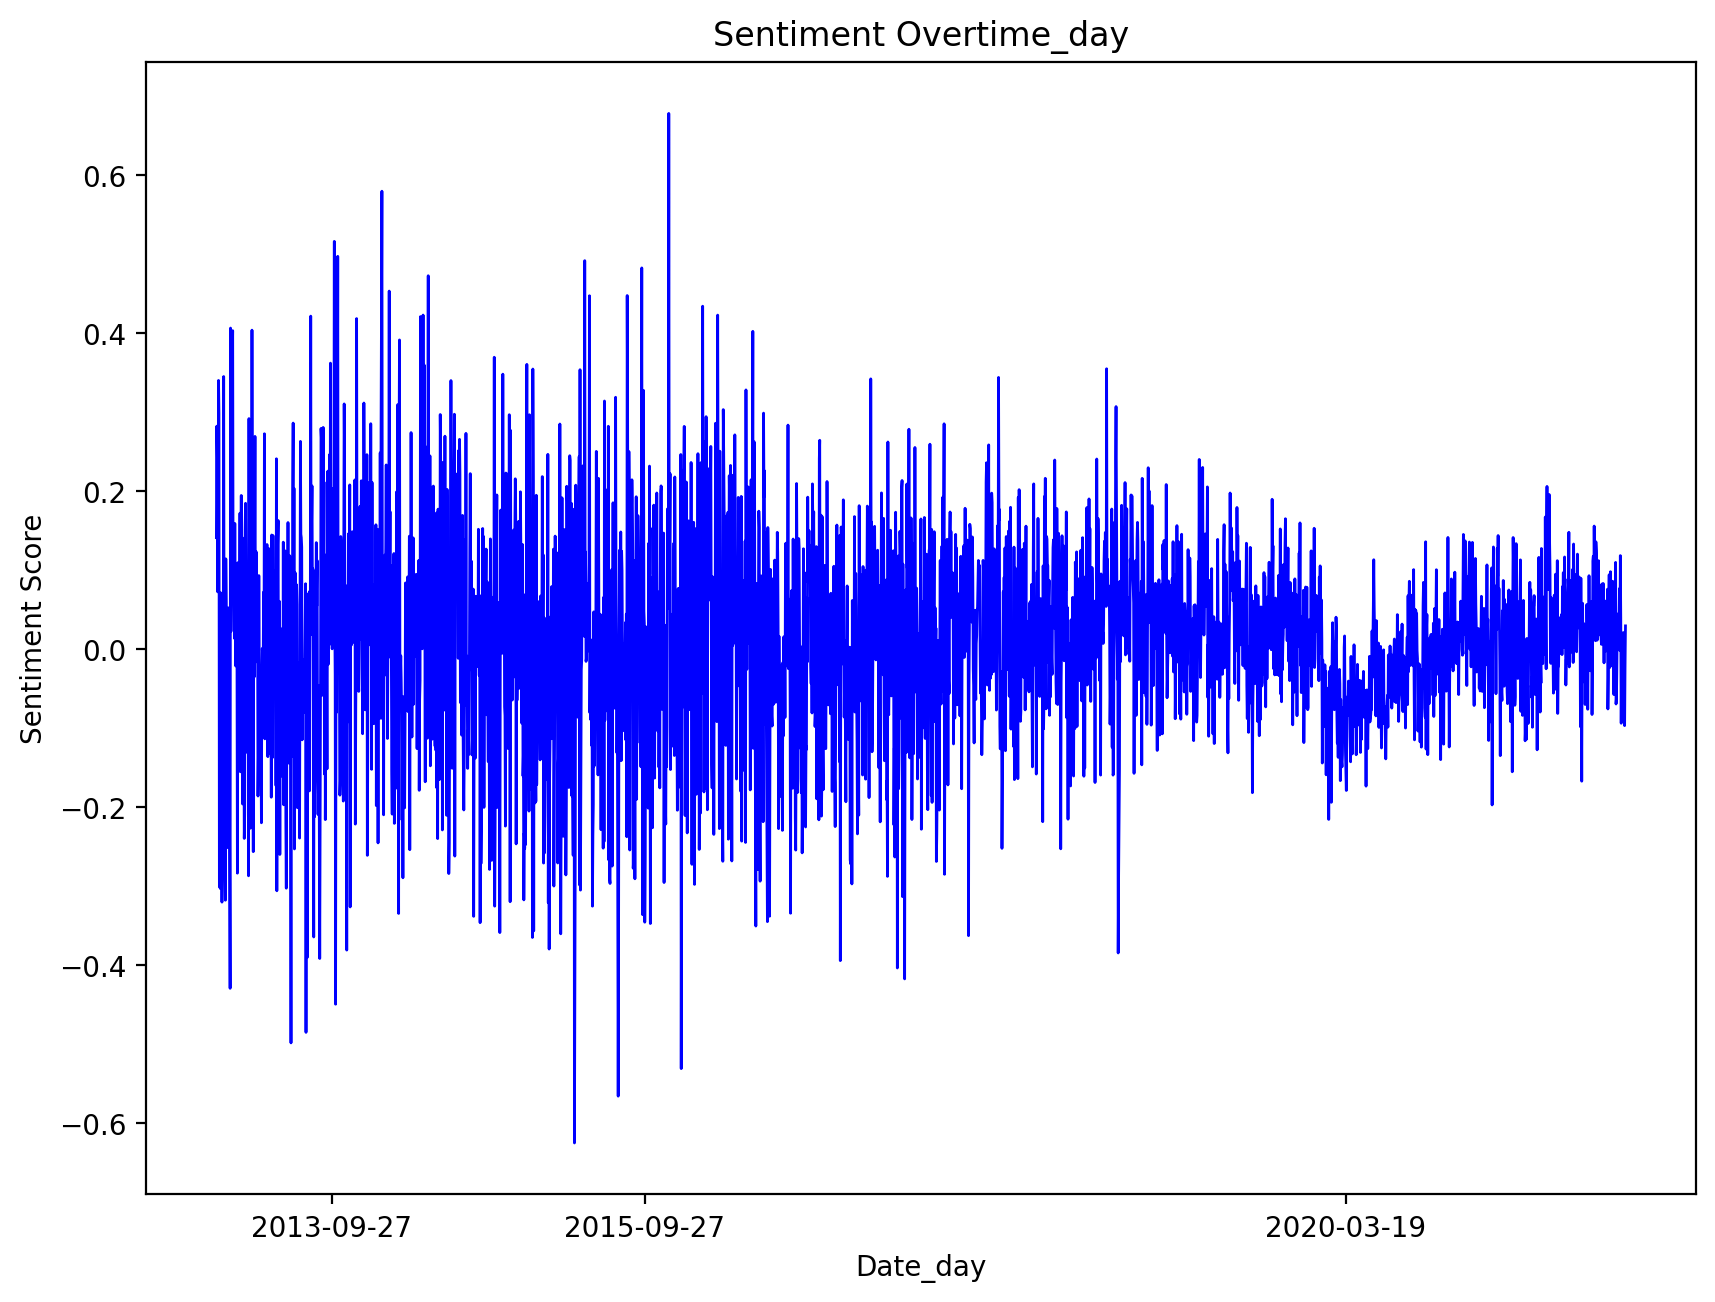

In [14]:
plt.figure(figsize = (10, 7.5), dpi = 200) #调整画布大小，这一步要放到最开始

bp_x = mean_df2['date']
bp_y = mean_df2['senti']

# Make the plot
plt.plot(bp_x, bp_y, linewidth=1, linestyle="-", color="blue")
#挑选X轴的标签进行显示，两个方括号内的内容前后对应
plt.xticks(["2013-09-27", "2015-09-27", "2020-03-19"], ["2013-09-27", "2015-09-27", "2020-03-19"])
plt.xlabel(r"Date_day")
plt.ylabel(r"Sentiment Score")
plt.title(r"Sentiment Overtime_day")
plt.show()

In [15]:
df['date'] = pd.to_datetime(df['date']) #将df中的日期列转haunch鞥pandas能处理的日期序列datetime格式

In [16]:
#将df中的日期序列单独按照月份和年份分别提取，成为新的两列，并且已经加进了数据df中
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [17]:
df[0:50] #df中已经存在了新的两列：df['year']和df['month']，在最后

,Unnamed: 0,date,time,username,place,tweet,new_tweet,mentions,replies_count,retweets_count,likes_count,senti,hashtags,year,month
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...","@kurohera awww bb~ if it's any help, there's...",[],0,0,0,0.5994,[],2013,1
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,I'm afraid the only thing I thought as I saw a...,[],0,0,0,0.7003,[],2013,1
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,Battle damage is clear. Tonight was a massive ...,[],0,0,0,-0.8126,[],2013,1
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...",[],0,0,0,0.5927,[],2013,1
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,Welcome 2 another rescission da government kno...,[],0,0,0,0.7497,[],2013,1
5,5,2013-01-01,09:20:18,_lyssababyyy,NaN,I told brenden I was giving his old movies awa...,I told brenden I was giving his old movies awa...,[],0,0,0,0.7345,[],2013,1
6,6,2013-01-01,09:31:15,bluestarbabyllc,NaN,We are shutting down http://t.co/yl0gWJsA due...,We are shutting down http://t.co/yl0gWJsA due...,[],0,0,0,0.6808,[],2013,1
7,7,2013-01-01,10:01:28,energy_pulse,NaN,China maintains poor wind safety record: WORLD...,China maintains wind safety record: WORLDWID...,[],0,0,0,0.4767,[],2013,1
8,8,2013-01-01,01:17:45,chinanarrator,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...","[{'screen_name': 'shanghaiist', 'name': 'shang...",0,0,0,0.0000,"['china', 'chinanews']",2013,1
9,9,2013-01-01,18:51:06,liveconomics,NaN,Chinese leader Xi Jinping urges greater effort...,Chinese leader Xi Jinping urges greater effort...,[],0,1,0,-0.0258,[],2013,1


In [18]:
#合并df中的刚刚新创建的两列df['year']和df['month']，然后将其合并为新的一列：df['Y_M_date']
df['Y_M_date'] = df[['year', 'month']].astype(str).agg('-'.join, axis=1)
#mean_df2['date2'] = pd.to_datetime(mean_df2)
df[0:50]

,Unnamed: 0,date,time,username,place,tweet,new_tweet,mentions,replies_count,retweets_count,likes_count,senti,hashtags,year,month,Y_M_date
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...","@kurohera awww bb~ if it's any help, there's...",[],0,0,0,0.5994,[],2013,1,2013-1
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,I'm afraid the only thing I thought as I saw a...,[],0,0,0,0.7003,[],2013,1,2013-1
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,Battle damage is clear. Tonight was a massive ...,[],0,0,0,-0.8126,[],2013,1,2013-1
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...",[],0,0,0,0.5927,[],2013,1,2013-1
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,Welcome 2 another rescission da government kno...,[],0,0,0,0.7497,[],2013,1,2013-1
5,5,2013-01-01,09:20:18,_lyssababyyy,NaN,I told brenden I was giving his old movies awa...,I told brenden I was giving his old movies awa...,[],0,0,0,0.7345,[],2013,1,2013-1
6,6,2013-01-01,09:31:15,bluestarbabyllc,NaN,We are shutting down http://t.co/yl0gWJsA due...,We are shutting down http://t.co/yl0gWJsA due...,[],0,0,0,0.6808,[],2013,1,2013-1
7,7,2013-01-01,10:01:28,energy_pulse,NaN,China maintains poor wind safety record: WORLD...,China maintains wind safety record: WORLDWID...,[],0,0,0,0.4767,[],2013,1,2013-1
8,8,2013-01-01,01:17:45,chinanarrator,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...","[{'screen_name': 'shanghaiist', 'name': 'shang...",0,0,0,0.0000,"['china', 'chinanews']",2013,1,2013-1
9,9,2013-01-01,18:51:06,liveconomics,NaN,Chinese leader Xi Jinping urges greater effort...,Chinese leader Xi Jinping urges greater effort...,[],0,1,0,-0.0258,[],2013,1,2013-1


In [19]:
#df['Y_M_date']这一列还不是日期格式，只是字符串，直接拿去处理会导致后面计算的时候顺序错乱，必须在这里现转换成datetime格式
df['Y_M_date'] = pd.to_datetime(df['Y_M_date'])

In [20]:
df[0:50] #这时候再查看数据，就会发现df['Y_M_date']已经转成了可处理的日期格式，注意最后多了一个“-01”，可以不用管，实际上就是年月格式的

,Unnamed: 0,date,time,username,place,tweet,new_tweet,mentions,replies_count,retweets_count,likes_count,senti,hashtags,year,month,Y_M_date
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...","@kurohera awww bb~ if it's any help, there's...",[],0,0,0,0.5994,[],2013,1,2013-01-01
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,I'm afraid the only thing I thought as I saw a...,[],0,0,0,0.7003,[],2013,1,2013-01-01
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,Battle damage is clear. Tonight was a massive ...,[],0,0,0,-0.8126,[],2013,1,2013-01-01
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...",[],0,0,0,0.5927,[],2013,1,2013-01-01
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,Welcome 2 another rescission da government kno...,[],0,0,0,0.7497,[],2013,1,2013-01-01
5,5,2013-01-01,09:20:18,_lyssababyyy,NaN,I told brenden I was giving his old movies awa...,I told brenden I was giving his old movies awa...,[],0,0,0,0.7345,[],2013,1,2013-01-01
6,6,2013-01-01,09:31:15,bluestarbabyllc,NaN,We are shutting down http://t.co/yl0gWJsA due...,We are shutting down http://t.co/yl0gWJsA due...,[],0,0,0,0.6808,[],2013,1,2013-01-01
7,7,2013-01-01,10:01:28,energy_pulse,NaN,China maintains poor wind safety record: WORLD...,China maintains wind safety record: WORLDWID...,[],0,0,0,0.4767,[],2013,1,2013-01-01
8,8,2013-01-01,01:17:45,chinanarrator,NaN,"China's economy ends 2012 on a high, but 200m ...","China's economy ends 2012 on a high, but 200m ...","[{'screen_name': 'shanghaiist', 'name': 'shang...",0,0,0,0.0000,"['china', 'chinanews']",2013,1,2013-01-01
9,9,2013-01-01,18:51:06,liveconomics,NaN,Chinese leader Xi Jinping urges greater effort...,Chinese leader Xi Jinping urges greater effort...,[],0,1,0,-0.0258,[],2013,1,2013-01-01


In [21]:
#然后就可以按照月份来计算平均数了
month_mean_df = df.groupby("Y_M_date").agg({'senti':'mean'})
month_mean_df

,senti
Y_M_date,
2013-01-01,0.027234
2013-02-01,0.045741
2013-03-01,0.040643
2013-04-01,-0.014485
2013-05-01,-0.033034
...,...
2021-08-01,0.038564
2021-09-01,0.023710
2021-10-01,0.048055


In [22]:
#重置month_mean_df的索引，原来的还是把日期当成了索引，不好！
month_mean_df = month_mean_df.reset_index()
month_mean_df

,Y_M_date,senti
0,2013-01-01,0.027234
1,2013-02-01,0.045741
2,2013-03-01,0.040643
3,2013-04-01,-0.014485
4,2013-05-01,-0.033034
...,...,...
103,2021-08-01,0.038564
104,2021-09-01,0.023710
105,2021-10-01,0.048055
106,2021-11-01,0.035137


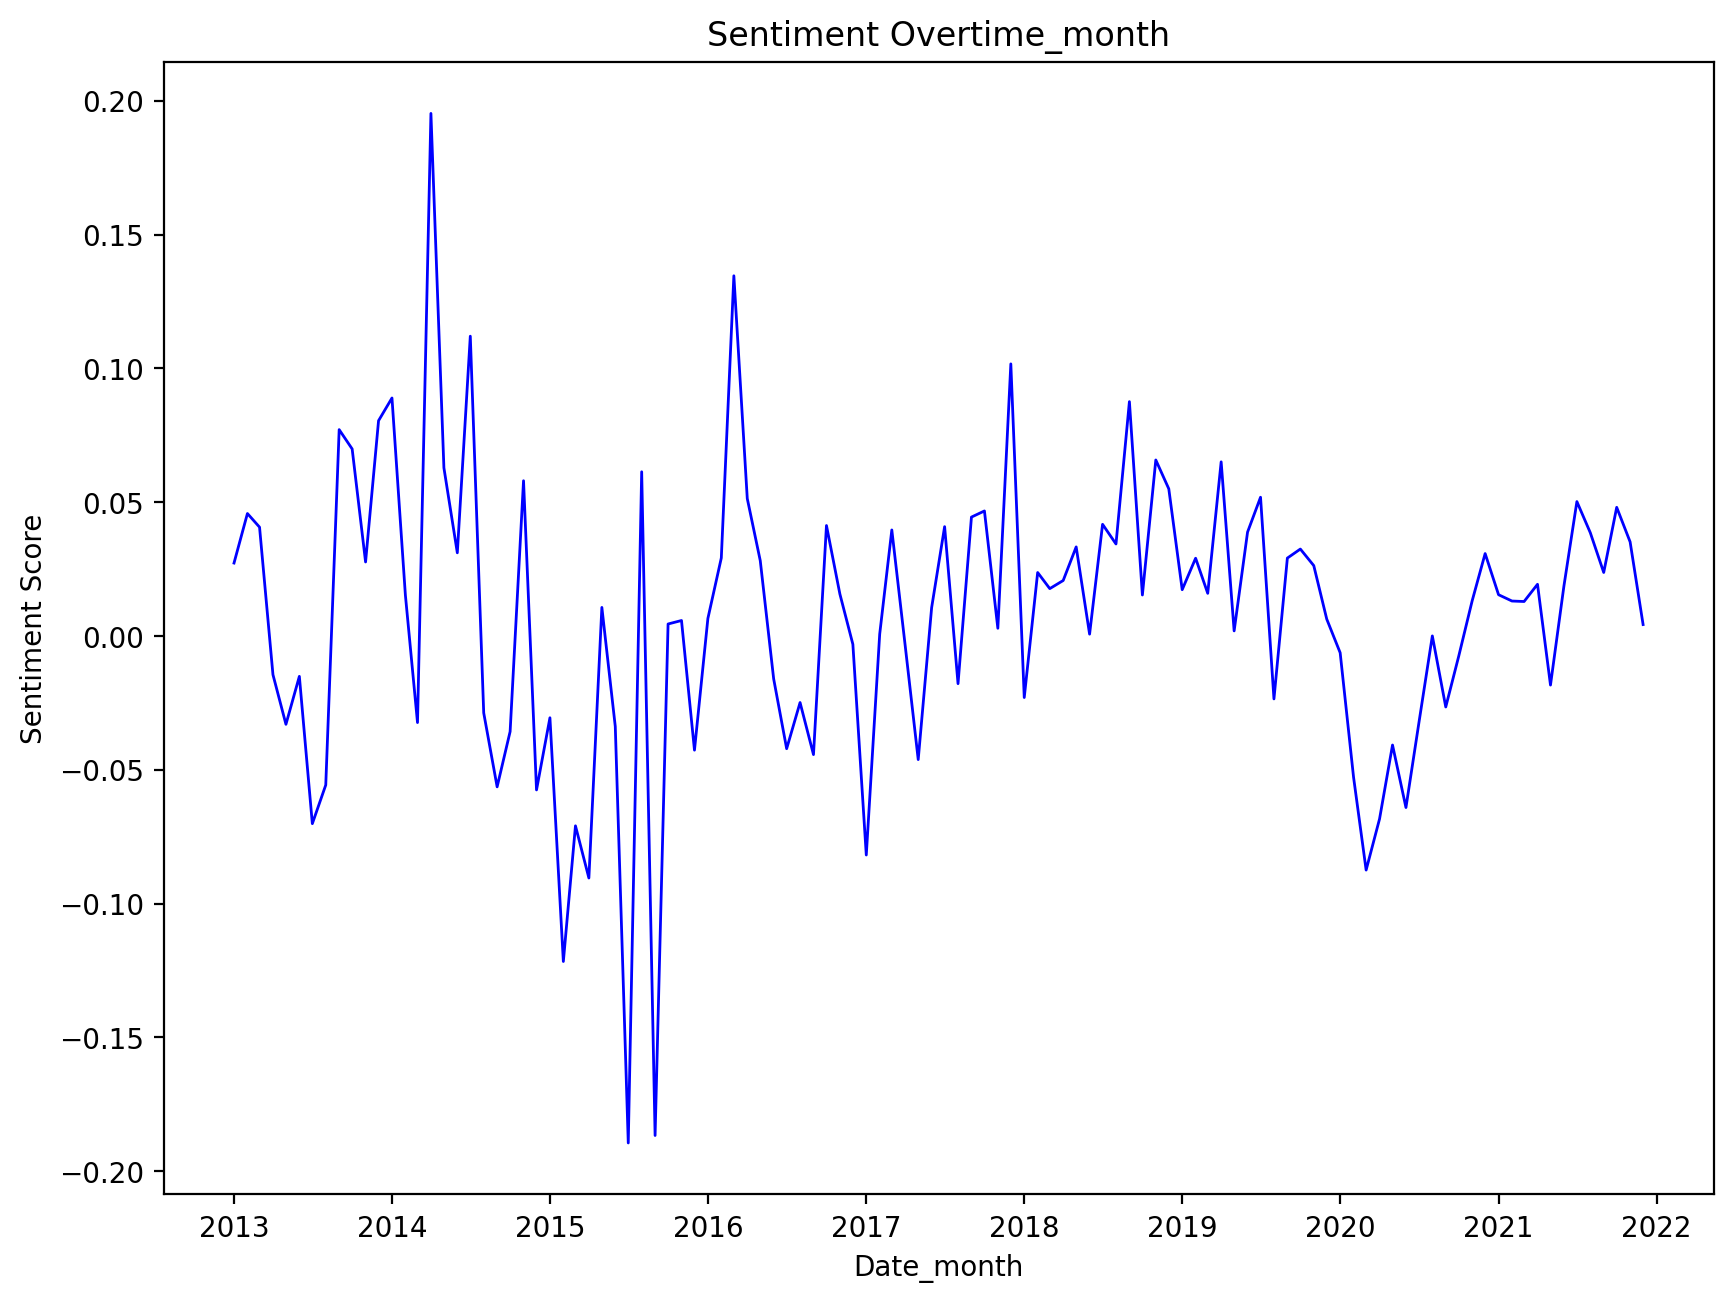

In [23]:
plt.figure(figsize = (10, 7.5), dpi = 200) #调整画布大小，这一步要放到最开始

bp_x = month_mean_df['Y_M_date']
bp_y = month_mean_df['senti']

# Make the plot
plt.plot(bp_x, bp_y, linewidth=1, linestyle="-", color="blue")
#挑选X轴的标签进行显示，两个方括号内的内容前后对应
#plt.xticks(["2013-09-01", "2015-09-01", "2020-03-01"], ["2013-09-27", "2015-09-01", "2020-03-01"])
plt.xlabel(r"Date_month")
plt.ylabel(r"Sentiment Score")
plt.title(r"Sentiment Overtime_month")
plt.show()

In [24]:
#根据年份来计算平均数
year_mean_df = df.groupby("year").agg({'senti':'mean'})
year_mean_df = year_mean_df.reset_index() #重置索引
year_mean_df

,year,senti
0,2013,0.013304
1,2014,0.034578
2,2015,-0.076096
3,2016,0.019264
4,2017,0.018395
5,2018,0.032544
6,2019,0.021699
7,2020,-0.033178
8,2021,0.021517


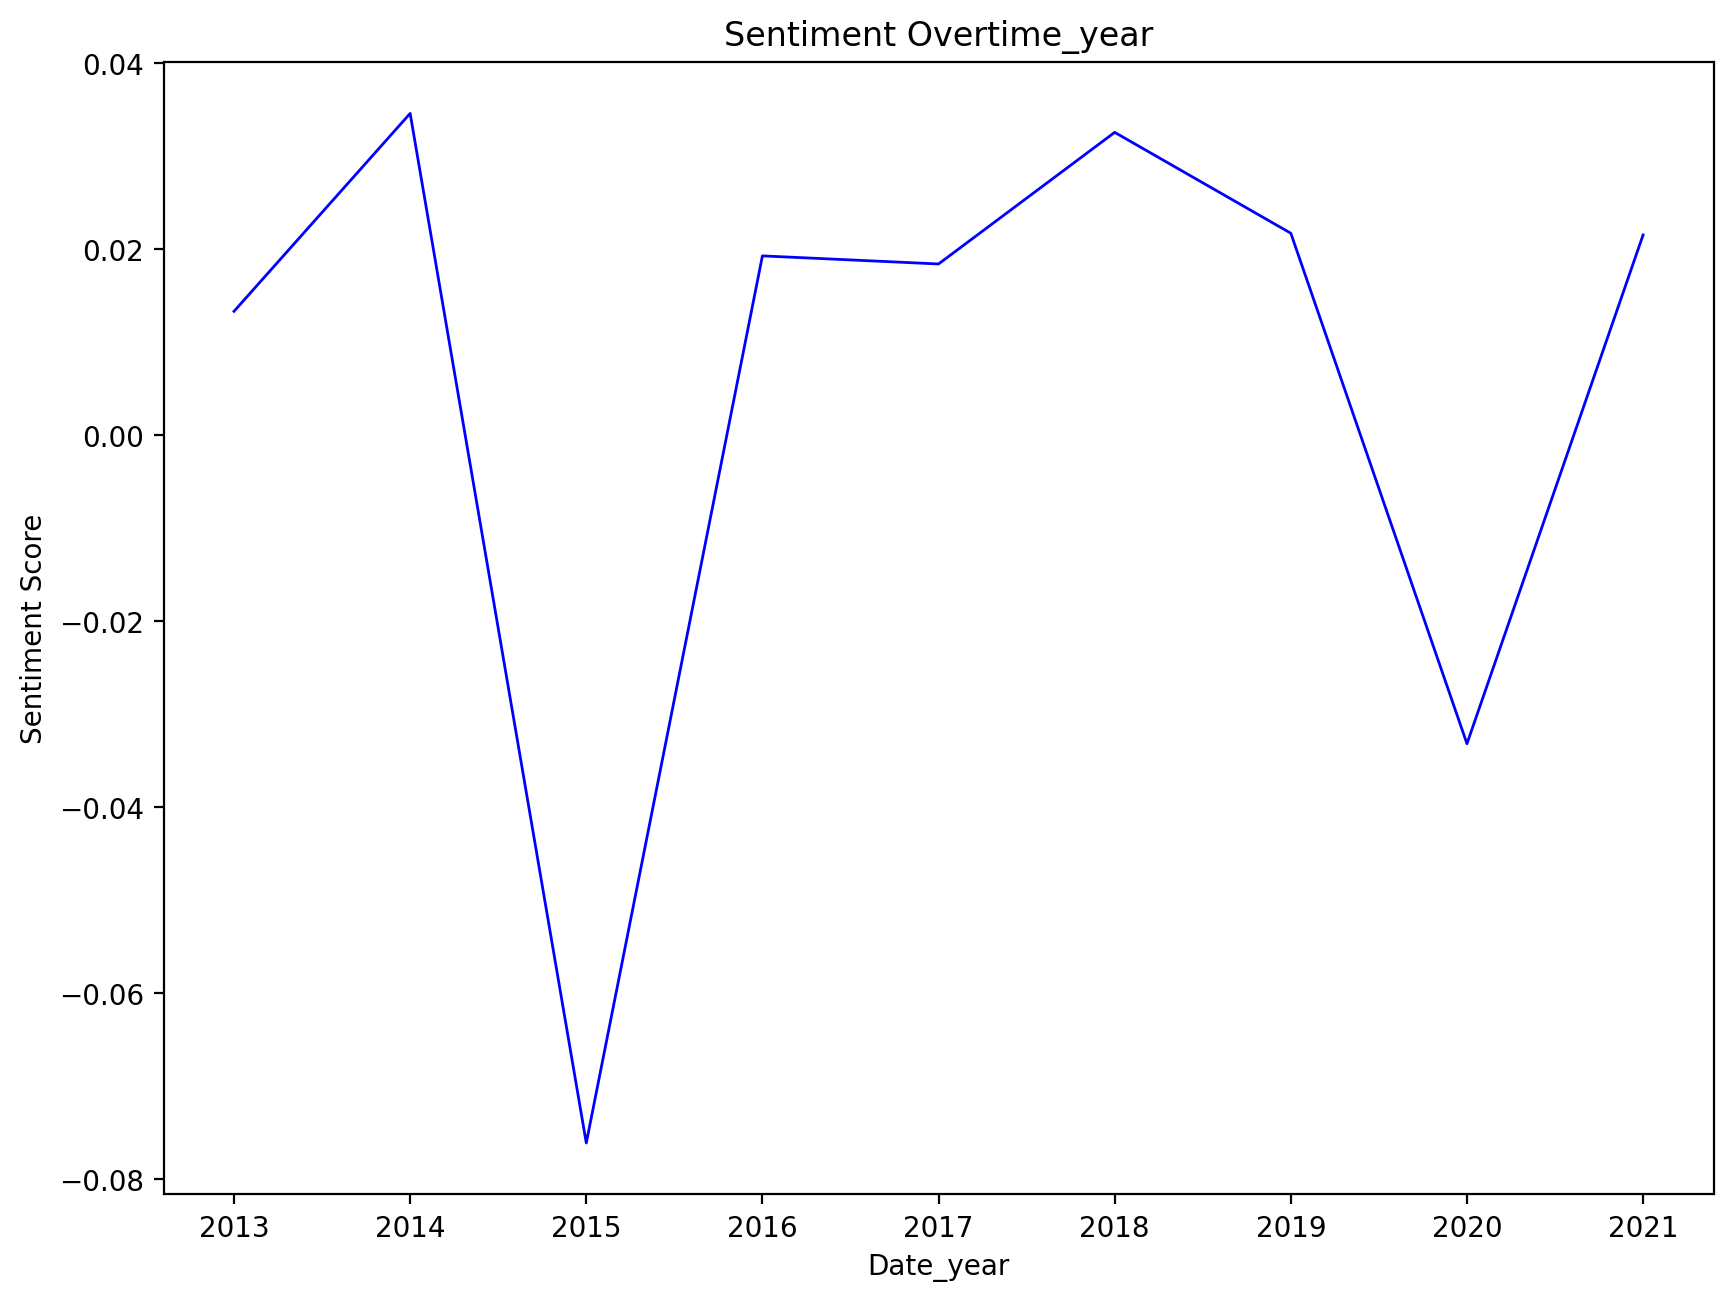

In [25]:
plt.figure(figsize = (10, 7.5), dpi = 200) #调整画布大小，这一步要放到最开始

bp_x = year_mean_df['year']
bp_y = year_mean_df['senti']

# Make the plot
plt.plot(bp_x, bp_y, linewidth=1, linestyle="-", color="blue")
#挑选X轴的标签进行显示，两个方括号内的内容前后对应
#plt.xticks(["2013-09-01", "2015-09-01", "2020-03-01"], ["2013-09-27", "2015-09-01", "2020-03-01"])
plt.xlabel(r"Date_year")
plt.ylabel(r"Sentiment Score")
plt.title(r"Sentiment Overtime_year")
plt.show()

In [27]:
df = df.drop(labels=['new_tweet'], axis=1) 
df

,Unnamed: 0,date,time,username,place,tweet,mentions,replies_count,retweets_count,likes_count,senti,hashtags,year,month,Y_M_date
0,0,2013-01-01,19:06:17,rotipeeta,NaN,"@kurohera awww poor bb~ if it's any help, ther...",[],0,0,0,0.5994,[],2013,1,2013-01-01
1,1,2013-01-01,23:13:13,waltydunlop,NaN,I'm afraid the only thing I thought as I saw a...,[],0,0,0,0.7003,[],2013,1,2013-01-01
2,2,2013-01-01,05:13:11,mrjintheuk,NaN,Battle damage is clear. Tonight was a massive ...,[],0,0,0,-0.8126,[],2013,1,2013-01-01
3,3,2013-01-01,01:29:28,financenewscast,NaN,"China's economy ends 2012 on a high, but 200m ...",[],0,0,0,0.5927,[],2013,1,2013-01-01
4,4,2013-01-01,05:21:28,warr1979,NaN,Welcome 2 another rescission da government kno...,[],0,0,0,0.7497,[],2013,1,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253262,253262,2021-12-31,13:58:29,ozzey_h,NaN,@wyldeAF @chenweihua @ScottAdamsSays Can guara...,[],0,0,0,0.2263,[],2021,12,2021-12-01
253263,253263,2021-12-31,17:25:30,redand51ue,NaN,Shedding a crocodile tear for Chinese people f...,[],0,0,0,-0.4588,"['ccp', 'emperorxi', 'ccp', 'commonprosperity']",2021,12,2021-12-01
253264,253264,2021-12-31,20:06:07,ray44758650,NaN,@CGTNOfficial WRONG!! Deng wisely took the CCP...,[],0,0,0,-0.5025,[],2021,12,2021-12-01
253265,253265,2021-12-31,21:52:54,chineseemb_uga,NaN,Here are some excerpts of🇨🇳President Xi Jinpin...,[],1,2,9,0.6249,[],2021,12,2021-12-01


In [29]:
df.to_excel('/Volumes/时伟SSD512G/扶贫数据-情感分析结果.xlsx')